In [1]:
%load_ext watermark
%watermark

2018-12-30T21:00:26-06:00

CPython 3.6.7
IPython 7.2.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


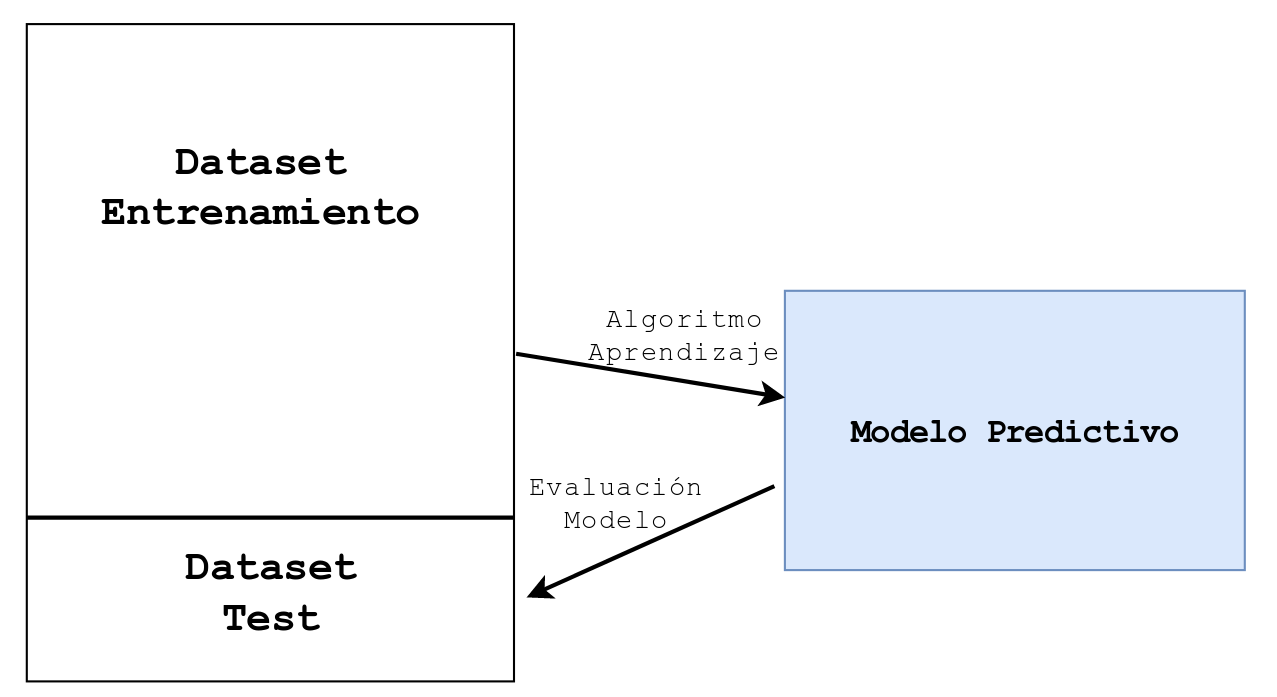

In [3]:
from IPython.display import Image
Image("./media/train_test_split.jpg")

In [5]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn import datasets

In [6]:
boston=datasets.load_boston()

In [13]:
def rmse(objetivo,estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo,estimaciones))
def adjuste_r2(objetivo,estimaciones,n,k):
    r2=metrics.r2_score(objetivo,estimaciones)
    return 1-(1-r2)*(n-1)/(n-k-1)
def evaluar_modelo(objetivo,estimaciones,n,k):
    return {
        "rmse":rmse(objetivo,estimaciones),
        "mae":metrics.mean_absolute_error(objetivo,estimaciones),
        "adjuste_r2":adjuste_r2(objetivo,estimaciones,n,k)
    }

In [10]:
#Cargamos el modelo
modelo_ols=LinearRegression()
#Ajustamos el modelo
modelo_ols.fit(X=boston["data"],y=boston["target"])
#Aplicamos datos al modelo para obtener predicciones
modelo_ols_preds=modelo_ols.predict(boston["data"])

In [11]:
RESULTADOS={}

N es el numero de observaciones y K son el numero de coeficientes del modelo

In [14]:
N=boston["data"].shape[0]
K=len(modelo_ols.coef_)

RESULTADOS["ols"]=evaluar_modelo(
    boston["target"],
    modelo_ols_preds,
    N,
    K
)
RESULTADOS

{'ols': {'rmse': 4.679191295697281,
  'mae': 3.2708628109003177,
  'adjuste_r2': 0.733789726372463}}

Al entrenar con todos los datos produciomos un sobre ajuste del mismo modelo, porlo que tnemos que separar los daros de entrenamiento

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_test_split?

In [23]:
boston["data"].shape

(506, 13)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(
    boston["data"],boston["target"],test_size=0.33,random_state=13
)

Implementamos de nuevo el modelo con los datos obtenidos de entrenamiento

In [29]:
modelo_ols=LinearRegression()
modelo_ols.fit(X=X_train,y=y_train)
modelo_ols_train_preds=modelo_ols.predict(X_train)

In [35]:
RESULTADOS["ols_train"]=evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

In [36]:
RESULTADOS

{'ols': {'rmse': 4.679191295697281,
  'mae': 3.2708628109003177,
  'adjuste_r2': 0.733789726372463},
 'ols_train': {'rmse': 4.7217324545168475,
  'mae': 3.3008679922153585,
  'adjuste_r2': 0.7314907015939042}}

Aplicamos el entrenamiento con los datos de test

In [39]:
modelo_ols_test_preds=modelo_ols.predict(X_test)

RESULTADOS["ols_test"]=evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)
RESULTADOS

{'ols': {'rmse': 4.679191295697281,
  'mae': 3.2708628109003177,
  'adjuste_r2': 0.733789726372463},
 'ols_train': {'rmse': 4.7217324545168475,
  'mae': 3.3008679922153585,
  'adjuste_r2': 0.7314907015939042},
 'ols_test': {'rmse': 4.784178251750691,
  'mae': 3.558433720909821,
  'adjuste_r2': 0.6887158654171625}}

In [40]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [41]:
pd.DataFrame(RESULTADOS)

,ols,ols_train,ols_test
adjuste_r2,0.733790,0.731491,0.688716
mae,3.270863,3.300868,3.558434
rmse,4.679191,4.721732,4.784178


Vemos que al separar los datos de entrenamiento y los datos de test se obtiene un resultado
peor al evaluar los datos del test.
Podriamos parar aqui y decir "El error RMSE de mi modelo es 4.787026" y podriamos pensar que todo esta bien  ya que no hemos entrenado el modelo en los datos que hemos usado para evaluarlo.

Pero estariamos en un error grave ¿Por qué?

Recordar que hemos usado un random_state=13 para la funcion train_test_split que garantiza que la separacion de entrenamiento y test sea siempre la misma.Podemos usar cualquier numero para este argumento.
Que pasaria si usamos por ejemplo random_state=42

In [42]:
X_train,X_test,y_train,y_test=train_test_split(
    boston["data"],boston["target"],test_size=0.33,random_state=42
)

modelo_ols=LinearRegression()
modelo_ols.fit(X=X_train,y=y_train)
modelo_ols_train_preds=modelo_ols.predict(X_train)

RESULTADOS["ols_train"]=evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

modelo_ols_test_preds=modelo_ols.predict(X_test)

RESULTADOS["ols_test"]=evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)
RESULTADOS
import pandas as pd
pd.DataFrame(RESULTADOS)

,ols,ols_train,ols_test
adjuste_r2,0.733790,0.728804,0.702889
mae,3.270863,3.376419,3.148256
rmse,4.679191,4.794269,4.552365


!EL error en los datos de test es menor que los de estrenamiento! ¿Por qué? Sencillamente, ha dado la casualidad de que hemos separado los datos de una forma que los datos de test son muy faciles de estimar.

Para ver la magnitud del error en ql que estamos cayendo al hacer una sola separacion entre test y entrenamiento, vamos a probar un monton de semillas y cual es el rango del error que se puede obtener.

In [44]:
model=LinearRegression()
results=[]

def test_seed(seed):
    X_train,X_test,y_train,y_test=train_test_split(
        boston["data"],boston["target"],
        test_size=0.33,random_state=seed
    )
    test_preds=model.fit(X_train,y_train).predict(X_test)
    seed_rmse=rmse(y_test,test_preds)
    results.append([seed_rmse,seed])

In [45]:
for i in range(1000):
    test_seed(i)

In [48]:
results[:5]

[[5.153501900847664, 0],
 [4.5495577526265345, 1],
 [4.817966577147609, 2],
 [4.822833248024281, 3],
 [5.559184699608027, 4]]

In [50]:
#La funcion sorted ordena los elemtos en funcion del primer argumento de x del menor al mayor
results_sorted=sorted(results,key=lambda x:x[0],reverse=False)

In [47]:
results_sorted[0]

[3.6313142170769477, 635]

In [49]:
results_sorted[-1]

[6.788054714003129, 645]

**Validación Cruzada(Cross Validation)**

Vemos que entre la semilla con menor error de test y la semilla con mayor error hay una diferencia casi del doble!

Una forma de evitar el cometer este error es mediante la **Validacion cruzada**

In [60]:
![cross_val](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score?

In [67]:
#requiere el modelo sin ajustar
modelo_ols=LinearRegression()
X=boston["data"]
y=boston["target"]

resultados_validacion_cruzada=cross_val_score(
    estimator=modelo_ols,
    X=X,
    y=y,
    #El error medio cuadratico lo devuelve negativo
    scoring="neg_mean_squared_error",
    #Indicamos 10 particiones
    cv=10
)


In [68]:
resultados_validacion_cruzada

array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
        -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
        -33.32974507,  -10.96041068])

In [69]:
resultados_validacion_cruzada.mean()

-34.70525594452476

In [74]:
def rmse_cross_val(estimator,X,y):
    y_pred=estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y,y_pred))

In [75]:
#Hacemos particiones desde 10 a 200 particiones 
resultados_cv=[]
for i in range(10,200):
    cv_rmse=cross_val_score(
        estimator=modelo_ols,
        X=X,
        y=y,
        scoring=rmse_cross_val,
        cv=i
    ).mean()
    resultados_cv.append(cv_rmse)

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

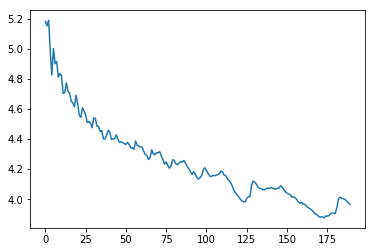

In [79]:
plt.plot(resultados_cv)

Una funcion mas potente es cross_validate

In [83]:
from sklearn.model_selection import cross_validate
scoring={"mea":"neg_mean_absolute_error","rmse":rmse_cross_val}
estimator=modelo_ols
scores=cross_validate(estimator,boston["data"],
                     boston["target"],scoring=scoring,
                     cv=10,return_train_score=True)

In [84]:
pd.DataFrame(scores).mean()

fit_time      0.001124
score_time    0.000890
test_mea     -4.004947
train_mea    -3.247644
test_rmse     5.180846
train_rmse    4.609067
dtype: float64